# Mall Customers

In [1]:
#Menampilkan Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Clustering K - Means

### Importing The Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing The Dataset

In [3]:
dt = pd.read_csv('/content/gdrive/MyDrive/Python TIA/ml-1m/Mall_Customers.csv')
X = dt.iloc[:,[3,4]].values #baris : semua, kolom: 3 dan 4

In [4]:
X.shape

(200, 2)

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Using the Elbow Method to finf the optimal numbers of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

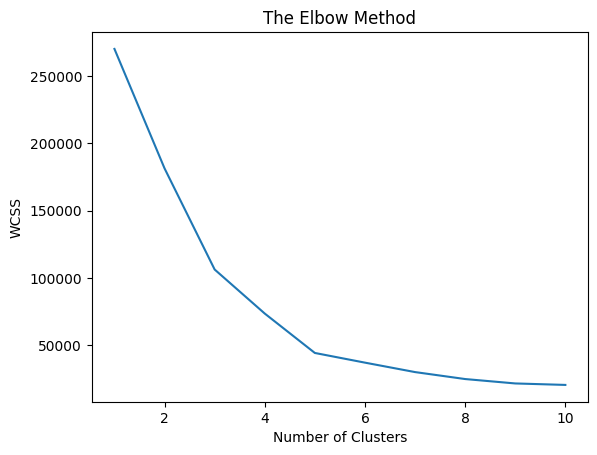

In [6]:
from sklearn.cluster import KMeans
wcss = []
# uji dengan 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# plot grafik 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Training the K-Means Model on the dataset

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
y_kmeans.shape

(200,)

In [9]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

### Visualising the clusters

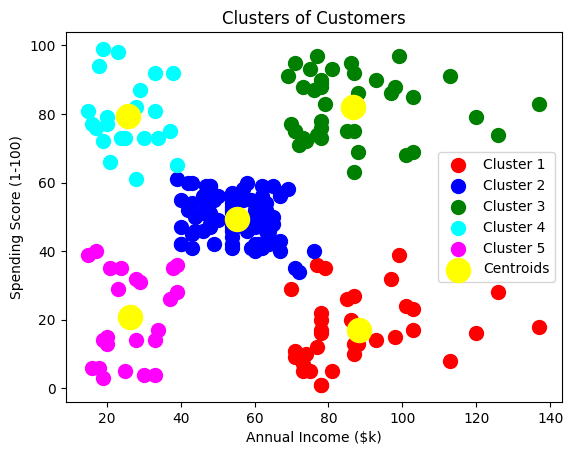

In [10]:
# scatter plot CLUSTER 1: X = annual income customer kategori 1 (0), y = spending score customer kategori 1 (0)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c='red', label ='Cluster 1'  )
# scatter plot ClUSTER 2: X = annual income customer kategori 2 (1), y = spending score customer kategori 2 (1)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c='blue', label ='Cluster 2'  )
# scatter plot ClUSTER 3: X = annual income customer kategori 3 (2), y = spending score customer kategori 3 (2)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c='green', label ='Cluster 3'  )
# scatter plot ClUSTER 4: X = annual income customer kategori 4 (3), y = spending score customer kategori 4 (3)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c='cyan', label ='Cluster 4'  )
# scatter plot ClUSTER 5: X = annual income customer kategori 5 (4), y = spending score customer kategori 5 (4)
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c='magenta', label ='Cluster 5'  )
# scatter centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label ='Centroids')
# plot info
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()